## **Import libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from scipy import stats
from scipy import io
import cv2
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier

### **Load data**

In [ ]:
data = io.loadmat('Data_hoda_full.mat')
type(data)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [ ]:
data['Data'].shape
data['labels'].shape

(60000, 1)

### **Train and Test data**

In [ ]:
X_train = np.squeeze(data['Data'][1000:2000])
y_train = np.squeeze(data['labels'][1000:2000])
X_test = np.squeeze(data['Data'][2000:2200])
y_test = np.squeeze(data['labels'][2000:2200])

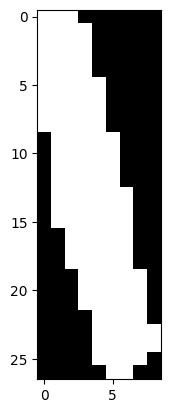

In [ ]:
i=234
plt.imshow (X_train[i], cmap='gray')

### **resize**

In [ ]:
X_train_10by10 = [cv2.resize(img, dsize=(10, 10)) for img in X_train]
X_test_10by10  = [cv2.resize(img, dsize=(10, 10)) for img in X_test ]


In [ ]:
X_train_vector = np.reshape(X_train_10by10 , [-1,100])

X_test_vector  = np.reshape(X_test_10by10 , [-1,100])


In [ ]:
X_train_vector.shape

(1000, 100)

### **Fit the model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_vector,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predict = knn.predict (X_test_vector)

### **Evaluation**

In [ ]:
np.mean(predict == y_test)

0.96

In [ ]:
acc = knn.score (X_test_vector, y_test)
print('accuracy is ',acc)

accuracy is  0.96
